# [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

>The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

>Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

>The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

>Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

We'll do it live.

# <a name="exploration">Exploration</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cc = pd.read_csv('Data/creditcard.csv')

In [3]:
cc.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

To summarize the Description:

1. This is European credit card data over the span of two days in September 2013
2. There exist 492 frauds out of 284,807 transactions (0.172% of all transactions).
3. All all data is numerical and all features are descriptionless except for 'Time', 'Amount', and 'Class':
  1. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
  2. 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. No units specified.
  3. 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
4. "Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification."

I guess we don't know who the card belongs to, etc. It's just a grouping of card data?

In [4]:
cc.describe(include='all')

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Do any features have Nans?
cc.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
cc.Time.tail()

284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [8]:
# Seconds to days
172792.0/86400

1.9999074074074075

In [9]:
cc['TimeHr'] = cc['Time']/3600.

In [10]:
cc.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9    ...          V22       V23       V24       V25  \
0  0.098698  0.363787    ...     0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425    ...    -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654    ...     0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024    ...     0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739    ...     0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class    TimeHr  
0 -0.189115  0.133558 -0.021053  149.62      0  0.000000  
1  0.125895 -0.008983  0.014724    2.69      0  0.000000  
2 -0.139097 -0.055353 -0.059752  378.66      0  0.000278  
3 -0.221929  0.062723  0.061458  123.50      0  0.000278  
4  0.502292  0.219422  0.215153   69.99      0  0.000556  

[5 rows x 32 columns]

My first thought is that (good) fraud may happen during normal purchasing times.

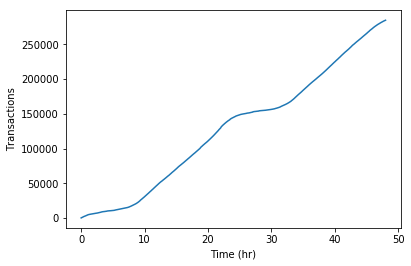

In [11]:
plt.figure()
x = cc.TimeHr
y = cc.index
plt.plot(x, y)
plt.xlabel('Time (hr)')
plt.ylabel('Transactions')
plt.show()

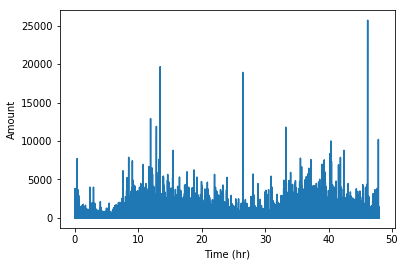

In [12]:
plt.figure()
x = cc.TimeHr
y = cc.Amount
plt.plot(x, y)
plt.xlabel('Time (hr)')
plt.ylabel(y.name)
plt.show()

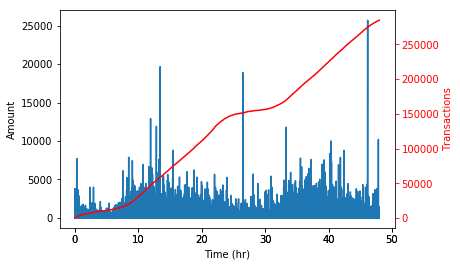

In [13]:
# I found this at http://thomas-cokelaer.info/blog/2012/04/481/
# and https://stackoverflow.com/questions/1982770/matplotlib-changing-the-color-of-an-axis
# But I am sure there's a more elegant solution...
fig = plt.figure()

ax1 = fig.add_subplot(111)
x = cc.TimeHr
y1 = cc.Amount
plt.plot(x, y1)
plt.xlabel('Time (hr)')
plt.ylabel(y1.name)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
y2 = cc.index
plt.plot(x, y2, 'r')
plt.ylabel('Transactions')
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors='r')
ax2.yaxis.label.set_color('r')
ax2.yaxis.set_label_position('right')

plt.show()

We see that spending amounts are at a maximum around noon and at a minumum after midnight. Except for those two spikes. We can also see the number of transactions decreases when people are presumably sleeping.

Now let's look at the Class.

In [14]:
cc.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

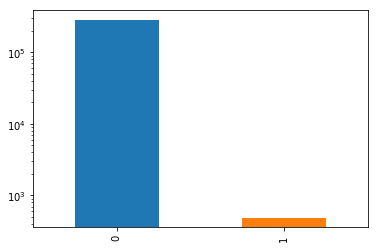

In [89]:
cc.Class.value_counts().plot(kind='bar', logy=True)

They weren't lying when they said there are very few fraud classes.

In [16]:
import seaborn as sns

In [17]:
#sns.pairplot(cc, hue='Class')

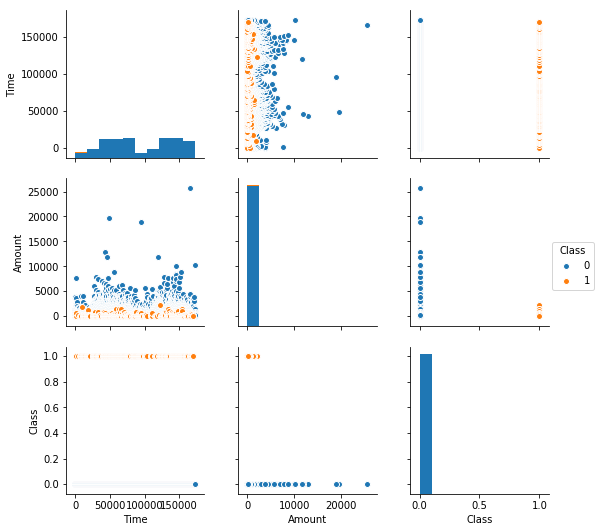

In [18]:
# Do not try to pairplot 30 features...
sns.pairplot(cc[['Time','Amount','Class']], hue='Class')
plt.show()

It seems fraud is for low amounts.

In [19]:
fraud = cc.loc[ cc.Class == 1]
legit = cc.loc[ cc.Class == 0]

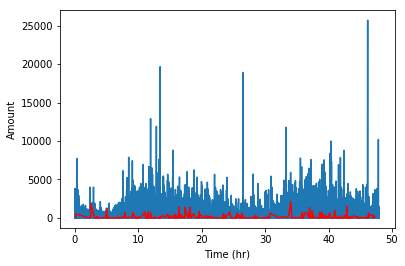

In [20]:
plt.figure()

xl = legit.TimeHr
yl = legit.Amount
plt.plot(xl, yl)

xf = fraud.TimeHr
yf = fraud.Amount
plt.plot(xf, yf, 'r')
plt.xlabel('Time (hr)')
plt.ylabel(yf.name)

plt.show()

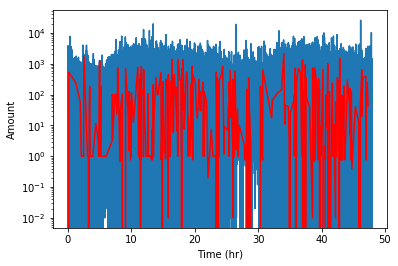

In [21]:
plt.figure()

xl = legit.TimeHr
yl = legit.Amount
plt.semilogy(xl, yl)

xf = fraud.TimeHr
yf = fraud.Amount
plt.semilogy(xf, yf, 'r')
plt.xlabel('Time (hr)')
plt.ylabel(yf.name)

plt.show()

Why is there some kind of baseline at Amount=10 for frauds?

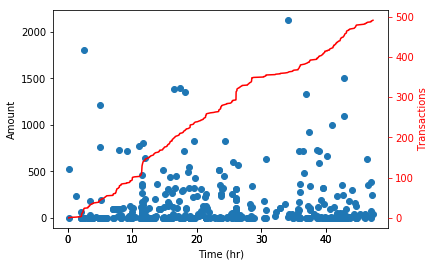

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
x = fraud.TimeHr
y1 = fraud.Amount
plt.scatter(x, y1) # plot is more easily discernible than scatter
#ax1.set_yscale('log')
plt.xlabel('Time (hr)')
plt.ylabel(y1.name)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
y2 = range(len(fraud)) #fraud.index
plt.plot(x, y2, 'r')
plt.ylabel('Transactions')
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors='r')
ax2.yaxis.label.set_color('r')
ax2.yaxis.set_label_position('right')


plt.show()

These seem to be many very low values. Plotting in logy doesn't visualze well.

In [23]:
fraud.Amount.value_counts().iloc[:10]

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64

For ease, I may sometimes refer to the Amounts in dollars. The most common fraudulent amount is 1.00, followed by 0.00 (?!) and 99.99.

Okay, now I will try to look at other features... They're all anonymized but what other data besides time and amount would be recorded during a credit card transaction? Geolocation? Store? Current/remaining account balance/limit? They don't look like cooardinates, etc... All of them comtain negatives, too.

In [24]:
cc.head(); cc.describe(include='all')

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V22           V23           V24           V25  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...       -3.444850e-16  2.578648e-16  4.471968e-15  5.340915e-16   
std        ...        7.257016e-01  6.244603e-01  6.056471e-01  5.212781e-01   
min        ...       -1.093314e+01 -4.480774e+01 -2.836627e+00 -1.029540e+01   
25%        ...       -5.423504e-01 -1.618463e-01 -3.545861e-01 -3.171451e-01   
50%        ...        6.781943e-03 -1.119293e-02  4.097606e-02  1.659350e-02   
75%        ...        5.285536e-01  1.476421e-01  4.395266e-01  3.507156e-01   
max        ...        1.050309e+01  2.252841e+01  4.584549e+00  7.519589e+00   

                V26           V27           V28         Amount          Class  \
count  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000  284807.000000   
mean   1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619       0.001727   
std    4.822270e-01  4.036325e-01  3.300833e-01     250.120109       0.041527   
min   -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000       0.000000   
25%   -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000       0.000000   
50%   -5.213911e-02  1.342146e-03  1.124383e-02      22.000000       0.000000   
75%    2.409522e-01  9.104512e-02  7.827995e-02      77.165000       0.000000   
max    3.517346e+00  3.161220e+01  3.384781e+01   25691.160000       1.000000   

              TimeHr  
count  284807.000000  
mean       26.337183  
std        13.191152  
min         0.000000  
25%        15.055972  
50%        23.525556  
75%        38.700139  
max        47.997778  

[8 rows x 32 columns]

In [25]:
cc.mode()

Time        V1        V2        V3        V4        V5        V6  \
0  163152.0  1.245674 -0.326668 -2.752041 -0.842316 -0.562777 -1.011073   
1       NaN  2.055797  0.166975  0.488306  0.635322  2.463072  3.173856   

         V7        V8        V9   ...         V22       V23       V24  \
0 -0.432126 -0.160211  0.170362   ...   -0.816264  0.020675  0.357827   
1  0.014953  0.727706  0.608606   ...    0.844627  0.140304  0.726212   

        V25       V26       V27       V28  Amount  Class  TimeHr  
0  0.186423 -0.398828 -0.035866 -0.060282     1.0    0.0   45.32  
1  0.366624  0.096544  0.027735  0.018495     NaN    NaN     NaN  

[2 rows x 32 columns]

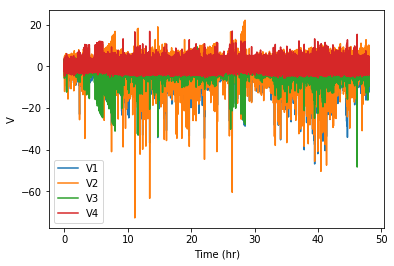

In [26]:
plt.figure()
x = cc.TimeHr
y1 = cc.V1
y2 = cc.V2
y3 = cc.V3
y4 = cc.V4
plt.plot(x, y1, label=y1.name)
plt.xlabel('Time (hr)')
plt.ylabel('V')
plt.plot(x, y2, label=y2.name)
plt.plot(x, y3, label=y3.name)
plt.plot(x, y4, label=y4.name)
plt.legend()
plt.show()

This above plot really doesn't help. Let's try some correlation heatmaps provided by pandas itself. 
df.corr = "Compute pairwise correlation of columns, excluding NA/null values"


In [27]:
# I guess for future reference, these are equal to eachother. I am still unsure which notation I prefer.
cc.loc[cc.Class == 1].head() == cc[cc['Class']==1].head()

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9   ...    \
541   True  True  True  True  True  True  True  True  True  True   ...     
623   True  True  True  True  True  True  True  True  True  True   ...     
4920  True  True  True  True  True  True  True  True  True  True   ...     
6108  True  True  True  True  True  True  True  True  True  True   ...     
6329  True  True  True  True  True  True  True  True  True  True   ...     

       V22   V23   V24   V25   V26   V27   V28  Amount  Class  TimeHr  
541   True  True  True  True  True  True  True    True   True    True  
623   True  True  True  True  True  True  True    True   True    True  
4920  True  True  True  True  True  True  True    True   True    True  
6108  True  True  True  True  True  True  True    True   True    True  
6329  True  True  True  True  True  True  True    True   True    True  

[5 rows x 32 columns]

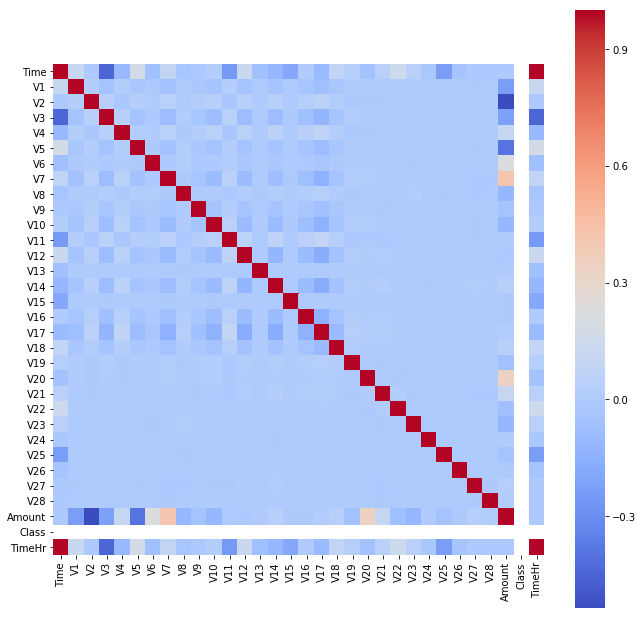

In [28]:
# Correlation heat map of the class = 0 = legitimate transactions
plt.figure(figsize=(11, 11))
legit = cc[cc['Class']==0]
legitcorr = legit.corr()
sns.heatmap(legitcorr, cmap='coolwarm', square=True)
#, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.show()

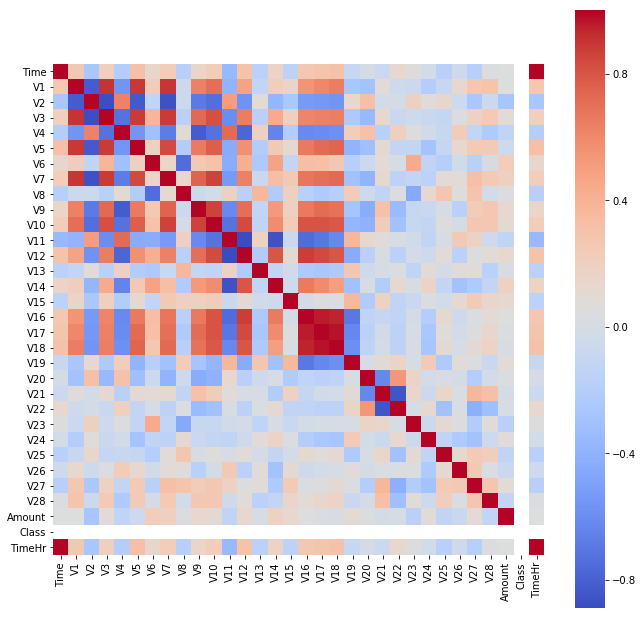

In [29]:
# Correlation heat map of the class = 1 = fraudulent transactions
plt.figure(figsize=(11, 11))
fraud = cc[cc['Class']==1]
fraudcorr = fraud.corr()
sns.heatmap(fraudcorr, cmap= 'coolwarm', square = True)
plt.show()

The fraud and legit heatmaps look different! Looks like there is (more) significant correlation, both negative and positive, with fraudulent transactions for features V1-V18 and V20-V22.

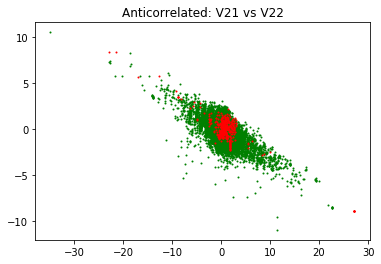

In [30]:
plt.figure()
plt.scatter(legit.V21, legit.V22, s=1, c='g')
plt.scatter(fraud.V21, fraud.V22, s=1, c='r')
plt.title('Anticorrelated: V21 vs V22')
plt.show()

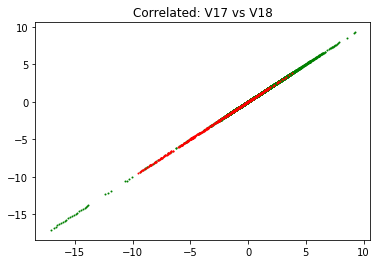

In [31]:
plt.figure()
plt.scatter(legit.V17, legit.V17, s=1, c='g')
plt.scatter(fraud.V18, fraud.V18, s=1, c='r')
plt.title('Correlated: V17 vs V18')
plt.show()

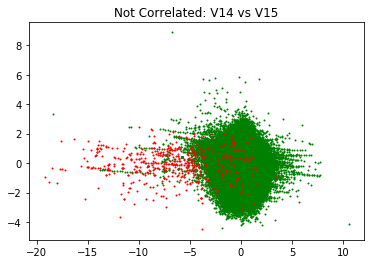

In [32]:
plt.figure()
plt.scatter(legit.V14, legit.V15, s=1, c='g')
plt.scatter(fraud.V14, fraud.V15, s=1, c='r')
plt.title('Not Correlated: V14 vs V15')
plt.show()

In [33]:
fraudcorr

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.263358 -0.255465  0.209597 -0.196576  0.320502  0.143117   
V1      0.263358  1.000000 -0.819226  0.907875 -0.562688  0.894968  0.223961   
V2     -0.255465 -0.819226  1.000000 -0.876904  0.629688 -0.828391 -0.133373   
V3      0.209597  0.907875 -0.876904  1.000000 -0.723766  0.883689  0.383930   
V4     -0.196576 -0.562688  0.629688 -0.723766  1.000000 -0.550242 -0.310530   
V5      0.320502  0.894968 -0.828391  0.883689 -0.550242  1.000000  0.198775   
V6      0.143117  0.223961 -0.133373  0.383930 -0.310530  0.198775  1.000000   
V7      0.231853  0.897609 -0.862983  0.882312 -0.678238  0.839738  0.151266   
V8     -0.183096 -0.065787 -0.059535 -0.174837  0.099480 -0.207546 -0.743021   
V9      0.152750  0.631848 -0.684573  0.733208 -0.818853  0.658322  0.256004   
V10     0.226530  0.710112 -0.741085  0.818243 -0.726971  0.764589  0.301981   
V11    -0.354721 -0.394137  0.506316 -0.597534  0.721682 -0.444932 -0.432451   
V12     0.302886  0.481558 -0.571288  0.650644 -0.778764  0.565416  0.423068   
V13    -0.165013 -0.119662  0.092512 -0.170573  0.196479 -0.213756 -0.237620   
V14     0.176452  0.211217 -0.377940  0.442773 -0.643181  0.261163  0.480686   
V15    -0.153736  0.159328 -0.251141  0.208485 -0.212530  0.115591 -0.108935   
V16     0.275829  0.555452 -0.533731  0.617902 -0.614529  0.663324  0.331128   
V17     0.287232  0.606831 -0.546153  0.633947 -0.605937  0.723799  0.323536   
V18     0.309204  0.646210 -0.562368  0.641160 -0.582288  0.745599  0.266725   
V19    -0.087837 -0.257132  0.129530 -0.245012  0.232063 -0.393706 -0.181759   
V20    -0.002831 -0.296280  0.317072 -0.355431  0.306800 -0.314408 -0.068540   
V21    -0.068228  0.083158 -0.025126  0.127262 -0.179687  0.103431  0.096851   
V22     0.133427 -0.043392 -0.013726 -0.082243  0.196026 -0.112837  0.004450   
V23     0.062406 -0.064715  0.199605 -0.053028  0.056657 -0.107258  0.441265   
V24    -0.025825 -0.195991  0.079638 -0.075581 -0.026260 -0.290589 -0.126380   
V25    -0.167605 -0.090328  0.139412 -0.102828 -0.086619 -0.098699 -0.190253   
V26    -0.042885  0.133522 -0.054150  0.033203  0.236842  0.129076 -0.032648   
V27    -0.186088  0.271335 -0.254623  0.193183 -0.114434  0.249589 -0.178559   
V28     0.039952  0.284370 -0.056688  0.247184 -0.232332  0.251549 -0.000370   
Amount  0.048732  0.048216 -0.272762  0.089994 -0.133795 -0.052031  0.228130   
Class        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TimeHr  1.000000  0.263358 -0.255465  0.209597 -0.196576  0.320502  0.143117   

              V7        V8        V9    ...          V22       V23       V24  \
Time    0.231853 -0.183096  0.152750    ...     0.133427  0.062406 -0.025825   
V1      0.897609 -0.065787  0.631848    ...    -0.043392 -0.064715 -0.195991   
V2     -0.862983 -0.059535 -0.684573    ...    -0.013726  0.199605  0.079638   
V3      0.882312 -0.174837  0.733208    ...    -0.082243 -0.053028 -0.075581   
V4     -0.678238  0.099480 -0.818853    ...     0.196026  0.056657 -0.026260   
V5      0.839738 -0.207546  0.658322    ...    -0.112837 -0.107258 -0.290589   
V6      0.151266 -0.743021  0.256004    ...     0.004450  0.441265 -0.126380   
V7      1.000000  0.133989  0.754725    ...    -0.146239 -0.119346 -0.156862   
V8      0.133989  1.000000 -0.058956    ...     0.038024 -0.449208  0.125535   
V9      0.754725 -0.058956  1.000000    ...    -0.345583 -0.088287 -0.078098   
V10     0.859823 -0.021787  0.863966    ...    -0.301064 -0.086715 -0.114531   
V11    -0.528746  0.195576 -0.612541    ...     0.018205 -0.026682 -0.125512   
V12     0.634749 -0.180089  0.710584    ...    -0.159061 -0.004754 -0.044484   
V13    -0.073331  0.378451 -0.120863    ...     0.026393 -0.136068  0.086436   
V14     0.331426 -0.223916  0.525165    ...     0.121293  0.008118  0.177455   
V15     0.255876  0.196214  0.201735    ...    -0.122795 -0.085012  0.032913   
V16     0.6

Let's get just the features that exceed some +- correlation threshold.

In [87]:
#fraudcorr[fraudcorr > 0.5]

In [35]:
# From https://stackoverflow.com/questions/44889508/if-correlation-is-greater-than-0-75-remove-the-column-from-dataframe-of-pandas
# "Use np.eye to ignore the diagonal values and find all columns that have 
# some value whose absolute value is greater than the threshold. Use the 
# logical negation as a mask for the index and columns."
# It seems the ~ reverses the boolean. Hmm. 
# Could also probably use .where() instead of .mask()
thresh = 0.5
m = (fraudcorr.mask(np.eye(len(fraudcorr), dtype=bool)).abs() > thresh).any()
#print(m)
Fraudcorr = fraudcorr.loc[m, m]
#print(Fraudcorr)

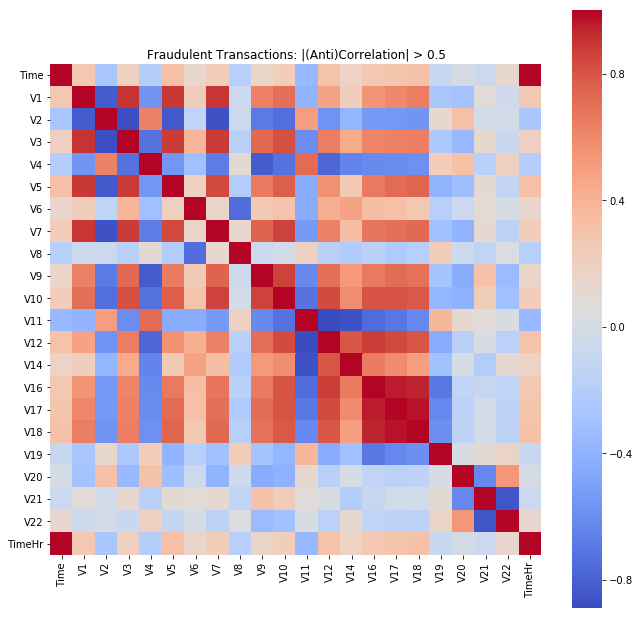

In [36]:
# Correlation heat map of the class = 1 = fraudulent transactions
# Just features above abs(thresh=0.5) correlation
plt.figure(figsize=(11, 11))
t = 'Fraudulent Transactions: |(Anti)Correlation| > '+str(thresh)
sns.heatmap(Fraudcorr, cmap= 'coolwarm', square = True).set_title(t)
plt.show()

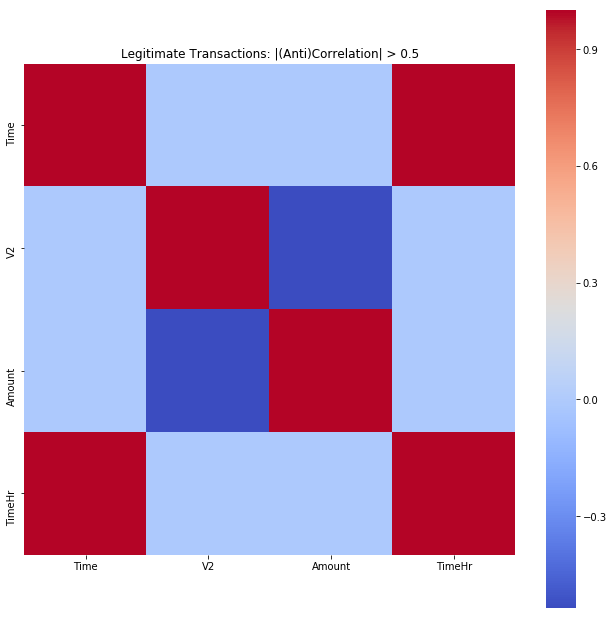

In [37]:
m = (legitcorr.mask(np.eye(len(legitcorr), dtype=bool)).abs() > thresh).any()
Legitcorr = legitcorr.loc[m, m]

# Correlation heat map of the class = 0 = legit transactions
plt.figure(figsize=(11, 11))
t = 'Legitimate Transactions: |(Anti)Correlation| > '+str(thresh)
sns.heatmap(Legitcorr, cmap= 'coolwarm', square = True).set_title(t)
plt.show()

Interesting to see that for legitimate transactions, V2 is anti correlated with Amount. I wonder what V2 is... It is NOT anticorrelated for fraudulent transactions, though.

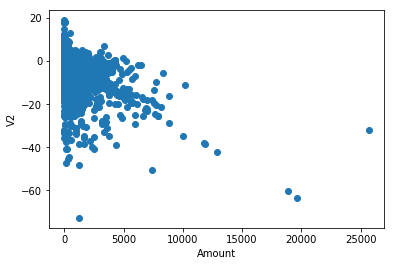

In [38]:
plt.figure()
x = legit.Amount
y = legit.V2
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

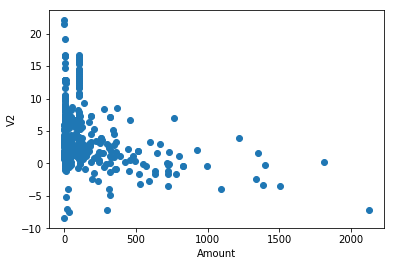

In [39]:
plt.figure()
x = fraud.Amount
y = fraud.V2
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

Anyway, let's get the list of high-correlation features in fraud. I'm sure these will be the most interesting and useful and fruitful to work with.

In [40]:
# Create list of useful features
ffeatures = list(Fraudcorr)
print(ffeatures)
# Remove artificially-created TimeHr feature
ffeatures.remove('TimeHr')
print(ffeatures)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'TimeHr']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']


In [41]:
# Useful features of transactions.
cc2 = cc[ffeatures+['Class']]
legit2 = cc2[cc2.Class == 0]
fraud2 = cc2[cc2.Class == 1]

I think I've found what I wanted: explore data for meaningful relationships between data, and find exploitable features for fraud detection. I've never worked with SVM so I will try SVM.

# <a name="svm">Support Vector Machine</a>


Can I train an SVM on a small subset of the data (to overcome the skewness) then redeploy it on the whole dataset? 

In [42]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [43]:
# There isn't much variance between features, but I'll scale anyway?
#cc2 = scale(cc2)

In [44]:
# Split legit2 into two random parts and take the "test" part.
# This is my way of taking a small sample of legit2...
ignore, legit3 = train_test_split(legit2, test_size=0.01)

In [52]:
print(len(legit3), len(fraud2))

2844 492


In [53]:
# Combine the small sample of legit2 and fraud2 into new df to be SVM'd
cc3 = pd.concat([legit3, fraud2])
len(cc3)

3336

In [46]:
# Split cc3 into train and test sets
train, test = train_test_split(cc3, test_size=0.3)

In [55]:
# Explicitly label training, test y,X for readbility.
y_train = train.Class
#y_test = test.Class
X_train = train.drop('Class', axis=1)
#X_test = test.drop('Class', axis=1)

In [54]:
# Define CLassiFier and fit it to small subset
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
# Attempt to predict back on the full, but feature-picked, dataset. 
# Cannot prediction on original dataset because of 30 features, not ~21 that
# SVM was trained to.
prediction = clf.predict(cc2.drop('Class', axis=1))

I originally calculated a report manually, then remembered (of course...) that sklearn contains a good report method. Below the manual, then after is the report. The results agree.

In [80]:
# Reference: http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
count = 0
falsepos = 0 # pos = fraud
truepos = 0
falseneg = 0 # neg = legit
trueneg = 0

for c,p in zip(cc2.Class, prediction):
    if (p == 1):
        if (c == 1):
            truepos += 1
        else:
            falsepos += 1
    else:
        if (c == 0):
            trueneg += 1
        else:
            falseneg += 1
    count += 1
    
print(falsepos, truepos, falseneg, trueneg)

0 352 140 284315


In [77]:
accuracy = (truepos + trueneg) / (truepos + falsepos + trueneg + falseneg)
precision = truepos / (truepos + falsepos)
recall = truepos / (truepos + falseneg)
F1 = 2*((precision * recall ) / (precision + recall))

print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 = " + str(F1))

Accuracy = 0.9995084390481975
Precision = 1.0
Recall = 0.7154471544715447
F1 = 0.8341232227488152


And the better way...:

In [78]:
from sklearn.metrics import classification_report
report = classification_report(cc2.Class, result)

In [79]:
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       1.00      0.72      0.83       492

avg / total       1.00      1.00      1.00    284807



When predicting a legitimate transaction (Class=0), everything is perfect. However, when predicting a fraudulent transaction (Class=1), everything is not perfect.

Here, precision is the ability of the SVM not to label as fraud a transaction that is legitimate; recall is the ability to find all the fraudulent transactions; and f1 is the weighted average of precision and recall.

I do not yet have an intuition on acceptable values of precision, recall, and f1. In the real world, I think it is almost always better to label a legitimate transaction as fraudulent than to label a fraudulent transaction as legitimate. So even though precision is perfect, recall is pretty low. Really, how do we maximize recall firsty, then maximize precision? I.e. how can we flip the values of precision and recall here?